In [1]:
# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton
%matplotlib inline

import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, log_loss
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict,cross_val_score
#KNeighboursClassifier = KNeighborsClassifier # For the Brits!


sys.path.append('..')

# Your Code goes here:
# Set all the precisions to 3 digits
%precision 3
pd.set_option('precision', 3)

E:\Miniconda3\envs\py3iaml\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [101]:
#### Load the dataset Images_C_Train
data_path = os.path.join(os.getcwd(), 'datasets', 'ir_data.csv')
ir_data = pd.read_csv(data_path, delimiter = ',')

ir_data_x = ir_data[["Range"]]

ir_data_y = ir_data.drop(columns = "Range")
ir_data_y

ir_data_y.std(axis = 1)

0      6.086
1      0.000
2      6.535
3      0.000
4      6.628
5      0.000
6      6.095
7      0.690
8      6.646
9      1.397
10     6.988
11     4.377
12     9.507
13    10.058
14    14.930
15    20.704
16    21.823
17    22.646
18    28.973
19    20.427
20    28.879
21    25.069
22    30.442
23    22.248
24    29.172
25    21.821
26    28.087
27    23.805
28    25.171
29    24.260
dtype: float64

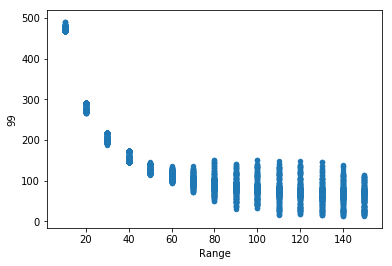

In [3]:
ax = ir_data.plot(kind='scatter', x='Range', y=1)   

for y in range(1,100):
    ax = ir_data.plot(kind='scatter', x='Range', y=y, ax=ax)  




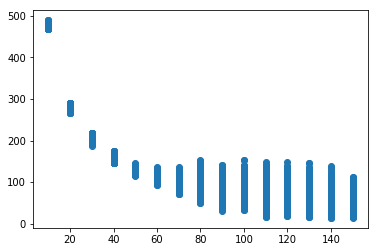

In [24]:
ir_x = ir_data_x.iloc[:,0]
ir_y = ir_data_y.iloc[:,0]

for i in range(1,100):  
    ir_x = ir_x.append(ir_data_x.iloc[:,0])
    ir_y = ir_y.append(ir_data_y.iloc[:,i])

ir = np.c_[ir_x, ir_y]

fig, ax = plt.subplots()
ax.scatter(ir_x, ir_y)

In [79]:
np.polyfit(ir_x, ir_y, 3)

array([-5.254e-04,  1.592e-01, -1.559e+01,  5.748e+02])

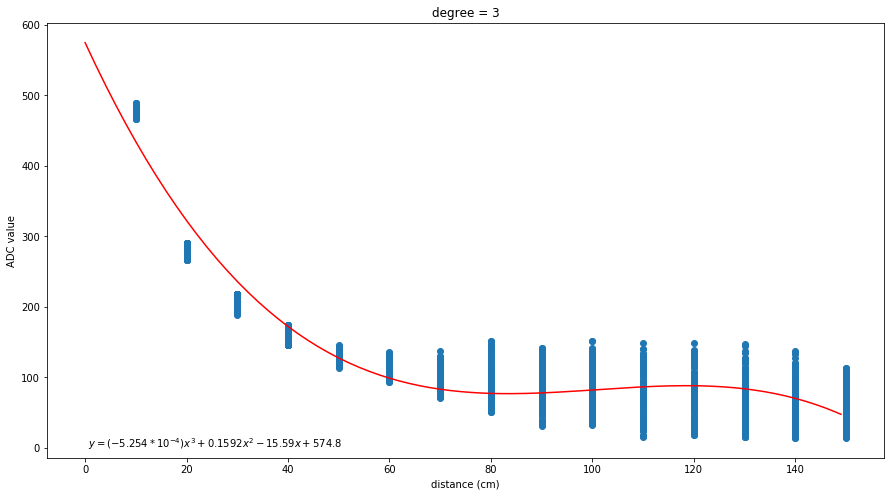

In [115]:
a = np.polyfit(ir_x, ir_y, 3)
x = np.arange(150)
y = a[0]*x**3 + a[1]*x**2 + a[2]*x**1 + a[3]

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(ir_x, ir_y)
ax.plot(x,y,color='r')
plt.xlabel('distance (cm)')
plt.ylabel('ADC value')
plt.text(0.5, 0.65, r'$y = (-5.254*10^{-4}) x^3 + 0.1592 x^2 -15.59 x + 574.8$')
plt.title('degree = 3')
plt.show()

In [58]:
np.polyfit(ir_x, ir_y, 4)

array([ 7.506e-06, -2.927e-03,  4.119e-01, -2.528e+01,  6.745e+02])

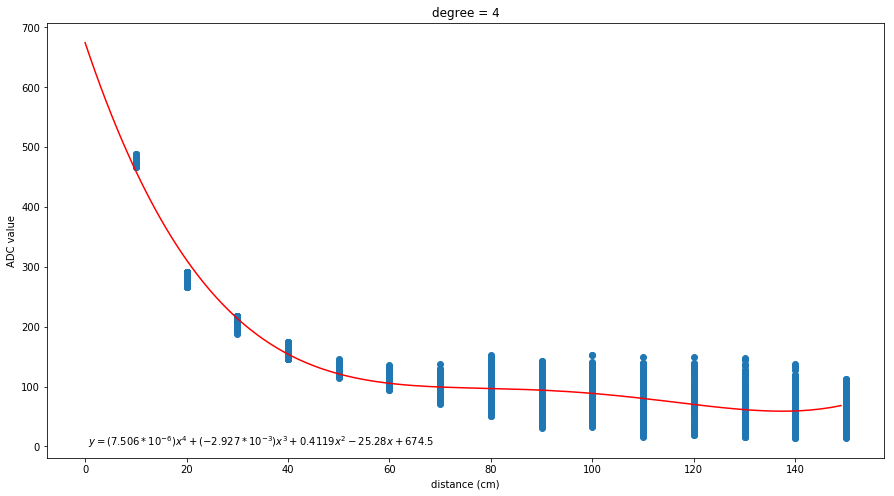

In [116]:
a = np.polyfit(ir_x, ir_y, 4)
x = np.arange(150)
y = a[0]*x**4 + a[1]*x**3 + a[2]*x**2 + a[3]*x**1 + a[4]

fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(ir_x, ir_y)
ax.plot(x,y,color='r')
plt.xlabel('distance (cm)')
plt.ylabel('ADC value')
plt.title('degree = 4')
plt.text(0.5, 0.65, r'$y = (7.506*10^{-6}) x^4 + (-2.927*10^{-3}) x^3 + 0.4119x^2 -25.28x + 674.5$')
plt.show()

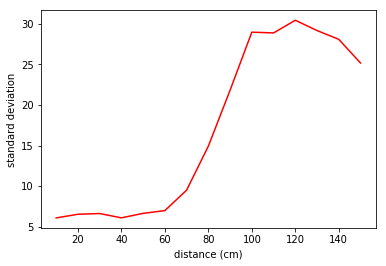

In [117]:
x_ = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

y_ = [6.086,6.535,6.628,6.095,6.646,6.988,9.507,14.930,21.823,28.973,28.879,30.442,29.172,28.087,25.171]

plt.xlabel('distance (cm)')
plt.ylabel('standard deviation')
plt.plot(x_,y_,color='r')
plt.show()